<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>September 28, 2023</center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 12 October 2023, 23h59**.
* The name of the file you upload should be **TP1_name_surname.ipynb**.
* If you need to include attached files to you TP (images, python files, ...), please archive them together in a **ZIP** folder named **TP1_name_surname.zip**.

### Exercise 1 : Color Channels
*(1 point)*

Read the image *colors.jpg*.  

(a) Display the original image using *matplotlib*.

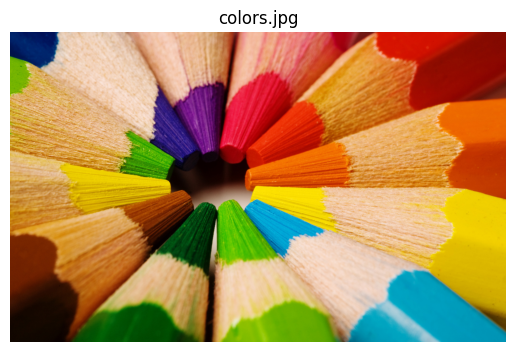

In [27]:
import matplotlib.pyplot as plt

image = plt.imread('./images/colors.jpg')

plt.figure()
plt.title("colors.jpg")
plt.imshow(image)
plt.axis('off')
plt.show()

(b) On a 1x3 subplot, display the three color components separately using correctly chosen colormaps.  
(That is, 'Reds_r' for red, 'Greens_r' for green and 'Blues_r' for blue)

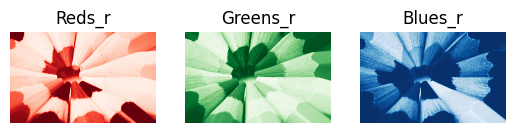

In [28]:
colors = ['Reds_r', 'Greens_r', 'Blues_r']

plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(image[:,:,i], cmap=colors[i])
    plt.axis('off')
    plt.title(colors[i])
plt.show()
    

(c) On 1x3 subplot, display three images:
1. fill original image's first channel with zeros

2. fill original image's second channel with zeros

3. fill original image's third channel with zeros

Explain the results

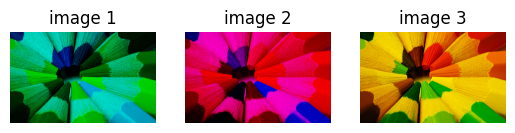

In [32]:
plt.figure()

for i in range(3):
    plt.subplot(1, 3, i+1)
    newimage = image.copy()
    newimage[:, :, i] = 0
    plt.imshow(newimage)
    plt.axis('off')
    plt.title(f'image {i + 1}')
plt.show()


(d) To transform an RGB image to grayscale, you need to take a weighted average of the different color channels :

$$grayscale = 0.2989 \times R + 0.5870 \times G + 0.1140 \times B$$

where, R,G,B are the red blue and green channels extracted (sliced) from the image.

1. Implement this operation using *Numpy* @ operator between the original image and the weight vector

$$w = [0.2125, 0.7154, 0.0721]$$

2. Obtain the same result by using the function *skimage.color.rgb2gray()*. Display it.

3. Compute singlechannel image by performing simple averaging of the color channels. Display it.

3. Compare the images, that you have obtained. Explain the differences and similarities in results.

(e) On a 1x3 subplot, display the three histograms of the three color components separately (you may want to use the function plt.hist())

### Exercise 2 : Numpy matrices

*(1 point)*

(a) Using *Numpy*, generate a gradient image like the one represented below :

<img src="images/grad.png" alt="drawing" width="400"/>

* Its shape should be $[125, 500]$
* Its dynamic range should be 0 to 255 encoded in a UINT8 array

and display it using *matplotlib*.

(b) Generate the images that are represented below using Numpy arrays of shape [2,2] and dtype boolean. Visualize the results on a $1 \times 3$ grid.

<img src="images/black_and_white.png" alt="drawing" width="800"/>

(c) Find a way to write the third array as a combination of the first two using *numpy* operators (addition, multiplication, *np.bitwise_and()*, *np.bitwise_not(), ...*)

(d) By correctly using color channels, only manipulating the gradient image you produced in (a), and the functions

* *np.stack()*
* *np.zeros_like()*

Produce the following image :

<img src="images/color_grad.png" alt="drawing" width="400"/>

---

### Exercise 3 : Numpy operators
*(1 point)*

(a) Read the image *lena.png* and display it. What is its dtype ? its dynamic range ? How many color channels does it have ?

(b) Compute the MSE (L2 distance) between the two grayscale images (any two grayscale images from Ex. 1.d) by using *np.linalg.norm()*. Comment on the value.

(c) On the grayscale image, crop the face of Lena using a rectangle with coordinates :

* Top-left (150, 100)
* Down-right (375, 380)

By using *Numpy* array slicing

(d) Normalize the RGB _lena.png_ image. First convert image to _np.float32_ and scale to _[0, 1]_ dynamic range, then substract _0.5_ from each color channel and divide each channel by _0.5_. Use Numpy scalar on matrix operations.

### Exercise 4 : Gaussian noise
*(1 point)*

Read the image *lena.png* and convert it to grayscale. Ensure that it has dtype _np.float32_ with dynamic range _[0, 1]_. 

(a) Define a *Numpy* array of same shape as the image, with each entry randomly sampled from a Gaussian distribution $\mathcal{N}(0, \sigma^2)$ with $\sigma = 0.01, 0.3, 0.5$.

Hint : Use *np.random.randn()* function

(b) Add this noise to the grayscale image using numpy array addition and visualise the results on a 1x3 subplot.

(c) Redo the preceding step using the function *skimage.util.random_noise()* with parameter *clip=True*.

(d) Explain why, for the same $\sigma$, the two methods yield different visual results.

--- Write your answer here ---

---

### Exercise 5 : Salt & Pepper Noise

*(1 point)*

Read the image *lena.png* and convert it to grayscale. Make sure that it has dtype float with dynamic range [0,1]. 

(a) Using *skimage.util.random_noise()* add the Salt & Pepper noise with density 

$$\rho = 0.01, 0.1, 0.5$$

and display the results.

(b) Explain the differences between the Gaussian noise and the S&P noise. Which one do you think is harder to remove ? Why ?

--- Write your answer here ---

(c) Write your own function that adds salt and pepper noise to the image. As inputs the function should take: input image - np.ndarray, p - percentage of the pixels to be replaced with noise. Make sure that your function works with singlechannel and multichannel images

In [1]:
import numpy as np
def add_salt_and_pepper(im_input: np.ndarray, p: float) -> np.ndarray:
    pass

---

### Exercise 6 : Mean and variance

*(1 point)*

Read the image *lena.png* and convert it to grayscale. Make sure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

(a) Compute the global mean and the global variance of the image using *np.mean()* and *np.std()*

Read the image *lena.png* as RGB image. Make sure that it has dtype _np.float32_ with dynamic range _[0, 1]_.

(b) Compute the global mean and the global variance of each image channel using *np.mean()* and *np.std()*. 

_Hint_: use _axis_ parameter in _np.mean()_ and _np.std()_ functions

(c) Compute the local mean and variance of the image for a window size $5 \times 5$ with splitting
steps 1 and 3. Display the obtained results as new (smaller) images. Explain the change
in the image size and give an interpretation of the results, from an image processing point
of view.

*Hint :* You may use the function *view_as_windows()* from *skimage.util.shape* package.

*Note :* do not use cycle, use Numpy array operations

---